In [1]:
import pandas as pd
import numpy as np

all_data = pd.read_csv('all_data.csv')
print(all_data.info(), '\n')
print(all_data.columns, '\n')
print(all_data.head(), '\n')
print(all_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None 

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object') 

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                            

In [2]:
all_data['GDP'] = all_data['GDP'].astype('int')
print(all_data.info(), '\n')
print(all_data.head(), '\n')
print(all_data['Country'].unique(), '\n')
print(all_data.columns, '\n')
print(min(all_data['Year']), max(all_data['Year']), '\n')
print(all_data.isnull().any(axis=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ KB
None 

  Country  Year  Life expectancy at birth (years)          GDP
0   Chile  2000                              77.3  77860932152
1   Chile  2001                              77.3  70979923960
2   Chile  2002                              77.8  69736811435
3   Chile  2003                              77.9  75643459840
4   Chile  2004                              78.0  99210392858 

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabw

In [3]:
print(f' Out of a maximum of 16 years, each country provided data for an average of {96/6} years.')

 Out of a maximum of 16 years, each country provided data for an average of 16.0 years.


EDA Complete. 

Knowns:
 - No nulls
 - 96 Rows, life expectancy and GDP of 6 countries between years 2000 and 2015. 

 Known unknowns: 
 - Collection method and aggregation type. 
 - Source integrity. 
 - Median or average life expectancy.

 Assumptions:
 - Life expectancy is averaged over the year.
 - GDP is total calendar year country GDP. 

 What can the Data tell us? 
 - Each country's life expectancy and GDP over time.
 - Rate of change
 - Relationship between life expectancy and GDP.

In [4]:
all_data['GDP in billions'] = all_data['GDP'].apply(lambda x: x/1000000000).astype(int)
all_data['Expected Life'] = all_data['Life expectancy at birth (years)'].astype(int)

In [5]:
life = all_data.pivot(index= 'Country', columns= 'Year', values= 'Expected Life')
life = life.sort_values(by=life.columns.tolist(), ascending=True)
gdp = all_data.pivot(index= 'Country', columns= 'Year', values= 'GDP in billions')
gdp = gdp.sort_values(by=gdp.columns.tolist(), ascending=True)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = sns.light_palette('cyan', as_cmap=True)
life.style.hide(names=True).background_gradient(cmap=cm).set_caption('Life expectancy in Years')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Zimbabwe,46,45,44,44,44,44,45,46,48,50,52,54,56,58,59,60
China,71,72,72,73,73,73,74,74,74,74,75,75,75,75,75,76
Mexico,74,75,75,75,75,75,75,76,75,75,75,76,76,76,76,76
United States of America,76,76,77,77,77,77,77,78,78,78,78,78,78,78,79,79
Chile,77,77,77,77,78,78,78,78,79,79,79,79,79,80,80,80
Germany,78,78,78,78,79,79,79,79,79,80,80,80,80,80,80,81


In [7]:
life = all_data[['Country', 'Year', 'Life expectancy at birth (years)']]
life['Rate of Change'] = life.sort_values('Year').groupby('Country')['Life expectancy at birth (years)'].diff()
life_delta = life[~life['Year'].isin([2000])]
life_delta = life_delta.pivot(index= 'Country', columns= 'Year', values= 'Rate of Change')
custom_order = ['Zimbabwe', 'China', 'Mexico', 'Chile', 'United States of America', 'Germany'] 
life_delta = (
    life_delta.sort_values(
        by='Country', 
        key=lambda x: x.map({v: i for i, v in enumerate(custom_order)})
    )
)
life_delta = (
    life_delta.style.hide(names=True)
    .background_gradient(cmap=cm)
    .format(precision=2)
    .set_caption('Life expectancy change in years')
)
life_delta

/var/folders/30/lzj3_85d6s1b6602f906tzq00000gn/T/ipykernel_54908/2727627193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life['Rate of Change'] = life.sort_values('Year').groupby('Country')['Life expectancy at birth (years)'].diff()


Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Zimbabwe,-0.70,-0.50,-0.30,-0.20,0.30,0.80,1.20,1.60,1.80,2.40,2.50,1.70,1.40,1.20,1.50
China,0.50,0.50,0.40,0.40,0.40,0.30,0.20,0.10,0.40,0.10,0.20,0.20,0.20,0.20,0.30
Mexico,0.20,0.00,0.00,0.40,-0.10,0.50,0.20,-0.40,0.10,-0.10,0.50,0.20,0.30,0.00,0.10
Chile,0.00,0.50,0.10,0.10,0.40,0.50,0.00,0.70,-0.30,-0.20,0.70,0.10,0.20,0.20,0.20
United States of America,0.10,0.10,0.20,0.30,0.00,0.30,0.30,0.10,0.30,0.20,0.00,0.10,0.10,0.20,0.20
Germany,0.30,0.10,0.10,0.60,0.10,0.40,0.20,0.10,0.10,0.10,0.40,0.10,0.00,0.30,0.10


In [8]:
cm = sns.light_palette('lime', as_cmap=True)
gdp.style.background_gradient(cmap=cm).set_caption('GDP in $ Billions')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Zimbabwe,6,6,6,5,5,5,5,5,4,8,10,12,14,15,15,16
Chile,77,70,69,75,99,122,154,173,179,172,218,252,267,278,260,242
Mexico,683,724,741,713,770,866,965,1043,1101,894,1051,1171,1186,1261,1298,1152
China,1211,1339,1470,1660,1955,2285,2752,3552,4598,5109,6100,7572,8560,9607,10482,11064
Germany,1949,1950,2079,2505,2819,2861,3002,3439,3752,3418,3417,3757,3543,3752,3890,3375
United States of America,10300,10600,11000,11500,12300,13100,13900,14500,14700,14400,15000,15500,16200,16700,17400,18100


In [9]:
gdp = all_data[['Country', 'Year', 'GDP']]
gdp['Rate of Change'] = gdp.sort_values('Year').groupby('Country')['GDP'].diff()
gdp['Rate of Change'] = (gdp['Rate of Change'] / gdp['GDP'].shift(1)) * 100
gdp_delta = gdp[~gdp['Year'].isin([2000])]
gdp_delta = gdp_delta.pivot(index= 'Country', columns= 'Year', values= 'Rate of Change')
custom_order = ['Zimbabwe', 'Chile', 'Mexico', 'China', 'Germany', 'United States of America'] 
gdp_delta = (
    gdp_delta.sort_values(
        by='Country', 
        key=lambda x: x.map({v: i for i, v in enumerate(custom_order)})
    )
)
gdp_delta = (
    gdp_delta.style.hide(names=True)
    .background_gradient(cmap=cm)
    .format(precision=1)
    .set_caption('% Change in GDP')
)
gdp_delta

/var/folders/30/lzj3_85d6s1b6602f906tzq00000gn/T/ipykernel_54908/2755070647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['Rate of Change'] = gdp.sort_values('Year').groupby('Country')['GDP'].diff()
/var/folders/30/lzj3_85d6s1b6602f906tzq00000gn/T/ipykernel_54908/2755070647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['Rate of Change'] = (gdp['Rate of Change'] / gdp['GDP'].shift(1)) * 100


Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Zimbabwe,1.3,-6.4,-9.7,1.4,-0.9,-5.4,-2.8,-16.6,95.2,17.6,19.3,17.7,8.5,2.8,2.6
Chile,-8.8,-1.8,8.5,31.2,23.9,25.9,12.2,3.5,-4.0,26.8,15.4,5.9,4.2,-6.2,-7.1
Mexico,6.0,2.3,-3.8,8.0,12.5,11.4,8.1,5.5,-18.7,17.5,11.4,1.3,6.4,2.9,-11.3
China,10.6,9.8,12.9,17.8,16.9,20.4,29.1,29.4,11.1,19.4,24.1,13.0,12.2,9.1,5.6
Germany,0.0,6.6,20.5,12.5,1.5,4.9,14.6,9.1,-8.9,-0.0,10.0,-5.7,5.9,3.7,-13.2
United States of America,2.9,3.8,4.5,7.0,6.5,6.1,4.3,1.4,-2.0,4.2,3.3,4.5,3.1,4.2,4.0


In [10]:
gdp_model_inputs = gdp.groupby('Country').agg({
    'Rate of Change' : [
        ['Total Change', np.sum],
        ['Mean Change', 'mean'],
        ['Median Change', 'median']
    ]
})
gdp_model_inputs.style.format(precision=2)


/var/folders/30/lzj3_85d6s1b6602f906tzq00000gn/T/ipykernel_54908/4135616340.py:1: FutureWarning: The provided callable <function sum at 0x10e7727a0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gdp_model_inputs = gdp.groupby('Country').agg({


This information bring a hypothesis to mind. 

Null: China will surpass the United States of America in GDP. 

Alt: China will not surpass the United States of America in GDP. 

Time to put codecademy's data aside and bring in more relevant data. 

In [11]:
# bringing files in seperately instead of globing to melt and merge. 
# https://www.imf.org/en/Publications/WEO/weo-database/assumptions-and-data-conventions
imf_gdp_pct = pd.read_csv('IMF real GDP growth annual percent change.csv')
imf_gdp_total = pd.read_csv('imf gdp total.csv')
print(imf_gdp_pct.head())
print(imf_gdp_total.head(), '\n')
print(imf_gdp_pct.columns, '\n', imf_gdp_total.columns)


  Real GDP growth (Annual percent change)     1980     1981     1982     1983  \
0                             Afghanistan  no data  no data  no data  no data   
1                                 Albania      2.7      5.7      2.9      1.1   
2                                 Algeria     -5.4        3      6.4      5.4   
3                                 Andorra  no data  no data  no data  no data   
4                                  Angola      2.4     -4.4        0      4.2   

      1984     1985     1986     1987     1988  ...   2020   2021  2022 2023  \
0  no data  no data  no data  no data  no data  ...   -2.4  -14.5  -6.2  2.7   
1        2     -1.5      5.6     -0.8     -1.4  ...   -3.3    8.9   4.9  3.5   
2      5.6      5.6     -0.2     -0.7     -1.9  ...     -5    3.8   3.6  4.1   
3  no data  no data  no data  no data  no data  ...  -11.2    8.3   9.6  1.4   
4        6      3.5      2.9      4.1      6.1  ...     -4    2.1   4.2    1   

      2024     2025     2026    

In [12]:
# melting
imf_gdp_pct = imf_gdp_pct.rename(columns={'Real GDP growth (Annual percent change)': 'Country'})
imf_gdp_total = imf_gdp_total.rename(columns={'GDP, current prices (Billions of U.S. dollars)': 'Country'})
pct_melt_columns = ['1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027',
       '2028', '2029']
total_melt_columns = ['1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026',
       '2027', '2028', '2029']
gdp_pct_melt = pd.melt(imf_gdp_pct, id_vars= 'Country', value_vars= pct_melt_columns, value_name= 'Growth %', var_name= 'Year')
gdp_total_melt = pd.melt(imf_gdp_total, id_vars= 'Country', value_vars= total_melt_columns, value_name= 'GDP', var_name= 'Year')
imf_data = pd.merge(gdp_pct_melt, gdp_total_melt, how= 'inner', on= ['Country', 'Year'], validate= '1:1')
print(imf_data.head())
imf_data['Country'].unique()

       Country  Year Growth %      GDP
0  Afghanistan  1980  no data  no data
1      Albania  1980      2.7    1.946
2      Algeria  1980     -5.4   45.957
3      Andorra  1980  no data  no data
4       Angola  1980      2.4     8.73


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile',
       "China, People's Republic of", 'Colombia', 'Comoros',
       'Congo, Dem. Rep. of the', 'Congo, Republic of ', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic', "Côte d'Ivoire", 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 

In [13]:
imf_data_country_index = imf_data.set_index('Country')

In [14]:
hypo_data = imf_data_country_index.loc[['United States', "China, People's Republic of"]].reset_index()
pivot_gdp = pd.pivot(hypo_data, columns= 'Year', index= 'Country', values= 'GDP')
pivot_growth = pd.pivot(hypo_data, columns= 'Year', index= 'Country', values= 'Growth %')
pivot_gdp.style.format(precision=0).set_caption('GDP in $ Billions')

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, People's Republic of",303.004,288.699,284.601,305.428,314.23,310.133,300.92,327.728,408.663,458.18,396.59,413.209,492.148,617.433,561.686,730.996,860.468,957.991,1024.167,1088.346,1205.532,1333.649,1465.829,1656.962,1949.446,2290.019,2754.149,3555.655,4577.28,5088.992,6033.83,7492.212,8539.584,9624.928,10524.241,11113.508,11226.897,12265.327,13841.812,14340.6,14862.564,17759.307,17848.54,17758.046,18273.357,19534.894,20810.882,22050.806,23319.715,24589.667
United States,2857.325,3207.025,3343.8,3634.025,4037.65,4339,4579.625,4855.25,5236.425,5641.6,5963.125,6158.125,6520.325,6858.55,7287.25,7639.75,8073.125,8577.55,9062.825,9631.175,10250.95,10581.925,10929.1,11456.45,12217.175,13039.2,13815.6,14474.25,14769.85,14478.05,15048.975,15599.725,16253.95,16880.675,17608.125,18295,18804.9,19612.1,20656.525,21539.975,21354.125,23681.175,26006.9,27720.725,29167.779,30337.162,31526.939,32786.79,34096.034,35457.964


Assessing complications of adjusting for inflation or deflation in China's case. 
Viewer note: 'Real' GDP growth means adjusted for inflation

In [15]:
pivot_growth.style.set_caption('Real GDP growth %')

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"China, People's Republic of",7.9,5.1,9,10.8,15.2,13.5,8.9,11.7,11.2,4.2,3.9,9,14.3,13.9,13,11,9.9,9.2,7.9,7.7,8.5,8.3,9.1,10,10.1,11.4,12.7,14.2,9.6,9.4,10.6,9.6,7.8,7.8,7.4,7,6.8,6.9,6.7,6,2.2,8.4,3,5.2,4.8,4.5,4.1,3.6,3.4,3.3
United States,-0.3,2.5,-1.8,4.6,7.2,4.2,3.5,3.5,4.2,3.7,1.9,-0.1,3.5,2.8,4,2.7,3.8,4.4,4.5,4.8,4.1,1,1.7,2.8,3.8,3.5,2.8,2,0.1,-2.6,2.7,1.6,2.3,2.1,2.5,2.9,1.8,2.5,3,2.6,-2.2,6.1,2.5,2.9,2.8,2.2,2,2.1,2.1,2.1


### At this point, I'll continue without adjusting for inflation and consider an inflation adjusted model later.

Steps:
 1) Calculate rate of change 
 2) Test aggregation methods
 3) Extrapolate using preferred aggregation method
 4) Interpret results

In [16]:
hypo_data['Year'] =hypo_data['Year'].astype(int)
hypo_data['Growth %'] = hypo_data['Growth %'].astype(float)
hypo_data['GDP'] = hypo_data['GDP'].astype(float)

In [17]:
hypo_data['Rate of Change'] = hypo_data.sort_values('Year').groupby('Country')['GDP'].diff()
hypo_data['Rate of Change'] = (hypo_data['Rate of Change'] / hypo_data['GDP'].shift(1)) * 100
print(hypo_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         100 non-null    object 
 1   Year            100 non-null    int64  
 2   Growth %        100 non-null    float64
 3   GDP             100 non-null    float64
 4   Rate of Change  98 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB
None


In [18]:
# for fun
def rnd_avg_change(country):
    sample_roc = []
    data = hypo_data[hypo_data['Country'] == country]['Rate of Change'].dropna()
    for i in range(5000):
        sample = np.random.choice(data, size=5000)
        sample_roc.append(np.mean(sample))
    return np.mean(sample_roc)
rnd_avg_change('United States')
rnd_avg_change('China, People\'s Republic of')

9.807055752233445

In [19]:
hypo_data_agg = hypo_data.groupby('Country').agg({
    'Rate of Change' : [
        ['Mean Change', 'mean'],
        ['Median Change', 'median']
    ]
})
hypo_data_agg.style.format(precision=2)

In [20]:
hypo_data['GDP shift'] = hypo_data['GDP'].shift(1) 
hypo_data = hypo_data[hypo_data['Year'] != 1980]

In [21]:

def add_mean(row, country):
    return row['GDP shift'] + (row['GDP shift'] * (hypo_data_agg.loc[country, 'Rate of Change'].loc['Mean Change'] / 100))
def add_median(row, country):
    return row['GDP shift'] + (row['GDP shift'] * (hypo_data_agg.loc[country, 'Rate of Change'].loc['Median Change'] / 100))
hypo_data['GDP mean E'] = hypo_data.apply(lambda row: add_mean(row, row['Country']), axis= 1)
hypo_data['GDP median E'] = hypo_data.apply(lambda row: add_median(row, row['Country']), axis= 1)



0.47958973592397486
0.9804247621425938
[[ 6.60734508 -3.05834925]
 [-3.05834925 94.40223635]]


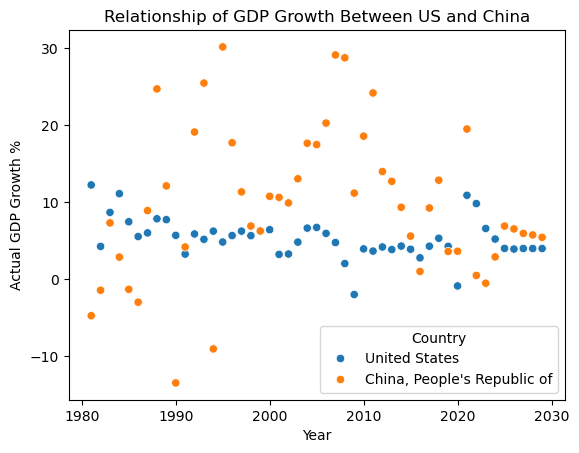

In [22]:
import scipy as scipy
us = hypo_data[hypo_data['Country'] == 'United States']
china = hypo_data[hypo_data['Country'] == 'China, People\'s Republic of']
print(scipy.stats.variation(us['Rate of Change']))
print(scipy.stats.variation(china['Rate of Change']))
print(np.cov(us['Rate of Change'], china['Rate of Change']))
sns.scatterplot(hypo_data, x= 'Year', y= 'Rate of Change', hue= 'Country')
plt.title('Relationship of GDP Growth Between US and China')
plt.ylabel('Actual GDP Growth %')
plt.show()

Since each country has significantly different economic factors, governance, and monetary policy, GDP growth is expected to be mildly unpredictable. 

US coeffient of variance is nearly half of China. Suggests China's GDP is more unpredictable. 

What is the probability of US or China having an average growth year?

In [23]:
def model(x, y, x_rate, y_rate, n, max_iterations=10000):
    while x < y and n < max_iterations:
        x += (x * x_rate)
        y += (y * y_rate)
        n += 1
    return x, y, n

model_year = hypo_data['Year'].min()
china.sort_values(by='Year').reset_index()
us.sort_values(by='Year').reset_index()
model_china_roc = hypo_data_agg.loc["China, People's Republic of", 'Rate of Change'].loc['Mean Change'] / 100
model_us_roc = hypo_data_agg.loc['United States', 'Rate of Change'].loc['Mean Change'] / 100
model(x= china.iloc[0, 3], y= us.iloc[0,3], x_rate= model_china_roc, y_rate= model_us_roc, n= model_year)

(65662.07404968717, 64281.76967957158, 2039)

In [24]:
model_china_roc = hypo_data_agg.loc["China, People's Republic of", 'Rate of Change'].loc['Median Change'] / 100
model_us_roc = hypo_data_agg.loc['United States', 'Rate of Change'].loc['Median Change'] / 100
model(x= china.iloc[0, 3], y= us.iloc[0,3], x_rate= model_china_roc, y_rate= model_us_roc, n= model_year)

(83039.82546072402, 81609.09352890734, 2045)

That was fun. Now a quick visual. I'll throw out IMF's projections, extrapolate using median to correct for some dispersion.

In [25]:
china = china[china['Year'] <2024].reset_index()
china = china[['Year', 'GDP']]
us = us[us['Year'] <2024].reset_index()
us = us[['Year', 'GDP']]
def add_rows(df, rate):
    while df['Year'].max() < 2036:
        year = df['Year'].iloc[-1] + 1
        gdp = df['GDP'].iloc[-1]
        new_gdp = gdp * (1 + rate)
        new_row = pd.DataFrame({'Year' : [year], 'GDP': [new_gdp]})
        df = pd.concat([df, new_row], ignore_index=True)
    return df
extrapolate_china = add_rows(china, model_china_roc)
extrapolate_us = add_rows(us, model_us_roc)


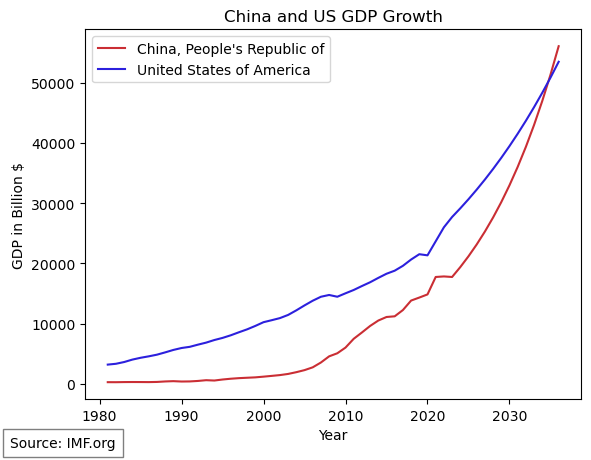

In [27]:
chart = pd.merge(left= extrapolate_china, right= extrapolate_us, how='left', left_index=True, right_index=True)
plt.plot(chart['Year_x'], chart['GDP_x'], label= "China, People's Republic of", color='#ca2e34')
plt.plot(chart['Year_y'], chart['GDP_y'], label= 'United States of America', color='#2c20dd')
plt.xlabel('Year')
plt.ylabel('GDP in Billion $')
plt.figtext(0.09, 0.01, "Source: IMF.org", ha="center", fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
plt.title('China and US GDP Growth')
plt.legend()
plt.show()
